In [173]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
#taking continues value
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

## Problem statements

>1) Delivery_time -> Predict delivery time using sorting time

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [102]:
df = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A4 Simple Linear Regression\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [104]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


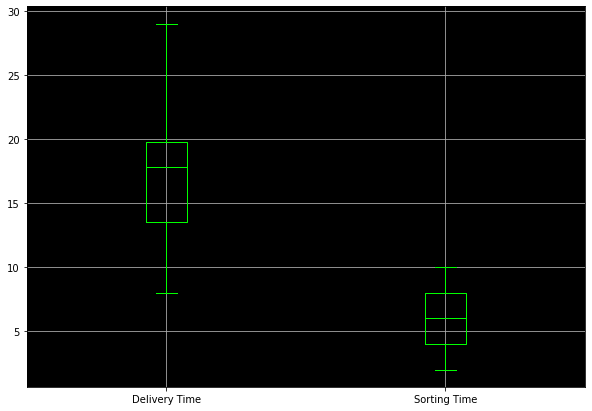

In [105]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
df.boxplot(color = "lime" )
plt.show()

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


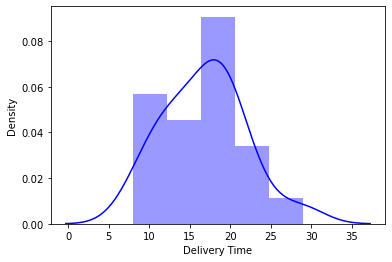

In [106]:
sns.distplot(df["Delivery Time"], kde=True, color = "blue")
plt.show()

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


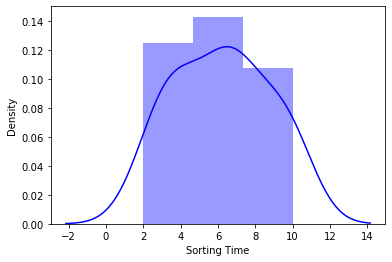

In [107]:
sns.distplot(df["Sorting Time"], kde=True, color = "blue")
plt.show()

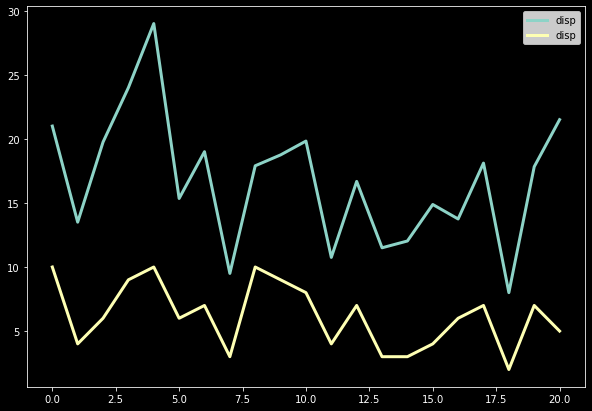

In [108]:
plt.figure(figsize=(10,7), facecolor='black')
with plt.style.context('dark_background'):
  plt.plot(df , label = "disp" , linewidth =3)
plt.legend(loc='upper right')
plt.show()

In [109]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [110]:
x = df["Sorting Time"]
x

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [123]:
y = df["Delivery Time"]
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

# **Hypothesis testing**

>*   H0 : Model is insignificant.
>*   H1 : Model is significant

>*   H0 : Regression Coefficients are insignificant.
>*   H1 : Regression Coefficients are significant.




# 1. Without any Transformation

In [130]:
model1 = smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        22:53:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


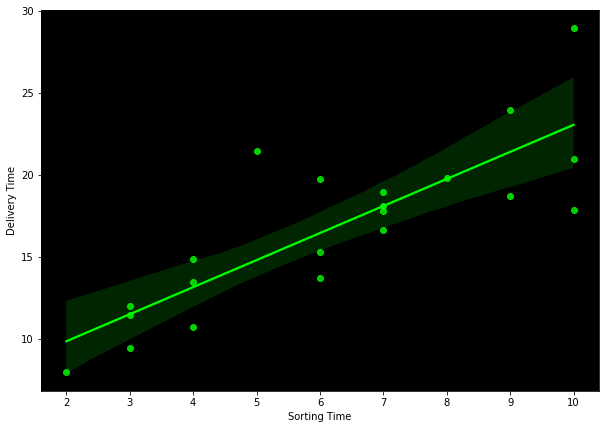

In [113]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x , y , data=df ,color = "lime" );
plt.show()

## 2.Lin-Log transformation

In [127]:
x_log=np.log(x)

In [131]:
model2 = smf.ols("y~x_log",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        22:53:24   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
x_log          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


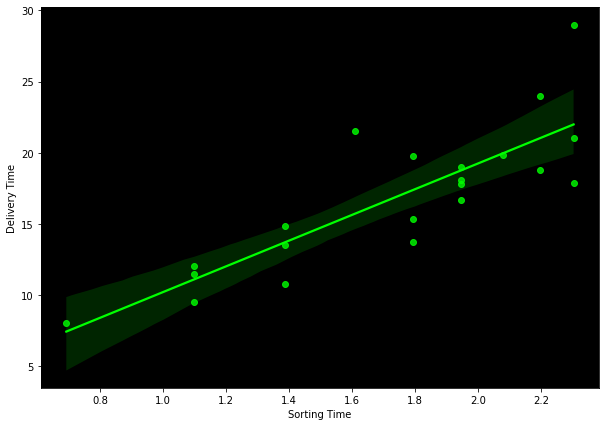

In [147]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_log , y , data=df ,color = "lime" );
plt.show()

## 3. Log-Lin transformation

In [132]:
y_log=np.log(y)

In [148]:
model3 = smf.ols("y_log~x",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                        23:00:35   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
x              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


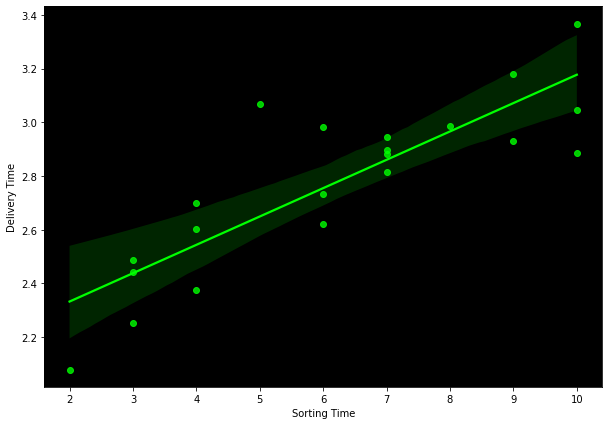

In [149]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x , y_log , data=df ,color = "lime" );
plt.show()

## 4. Log-Log transformation

In [134]:
y_log=np.log(y)
x_log=np.log(x)

In [135]:
model4 = smf.ols("y_log~x_log",data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                        22:55:14   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
x_log          0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


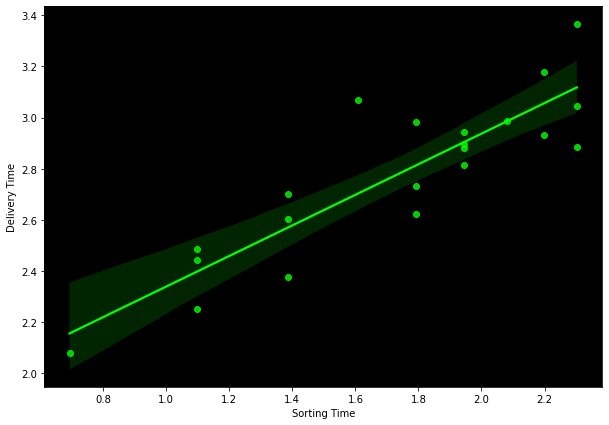

In [150]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_log , y_log , data=df ,color = "lime" );
plt.show()

## 5. Square-root transformation of X

In [136]:
x_sqrt = np.sqrt(x)

In [137]:
model5 = smf.ols("y~x_sqrt",data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.61e-06
Time:                        22:55:55   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
x_sqrt         7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


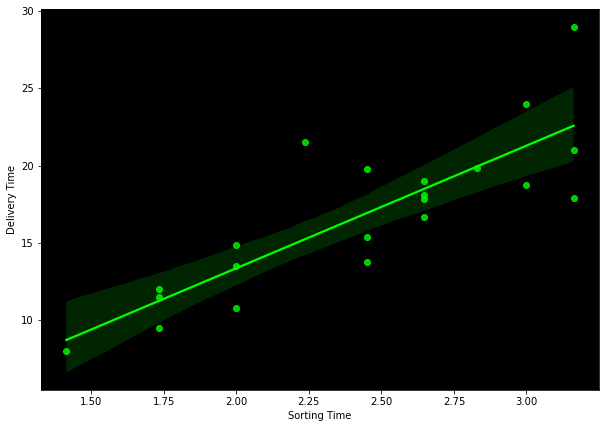

In [151]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_sqrt , y , data=df ,color = "lime" );
plt.show()

## 6. Square-root transformation of Y

In [138]:
y_sqrt = np.sqrt(y)

In [139]:
model6 = smf.ols("y_sqrt~x",data=df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.00e-06
Time:                        22:56:28   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
x              0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


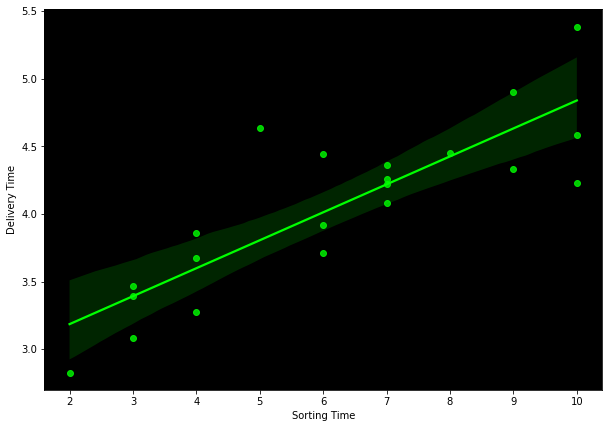

In [152]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x , y_sqrt , data=df ,color = "lime" );
plt.show()

## 7. Square-root transformation of X and Y

In [140]:
x_sqrt = np.sqrt(x)
y_sqrt = np.sqrt(y)

In [153]:
model7 = smf.ols("y_sqrt~x_sqrt",data=df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           8.48e-07
Time:                        23:02:40   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
x_sqrt         1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


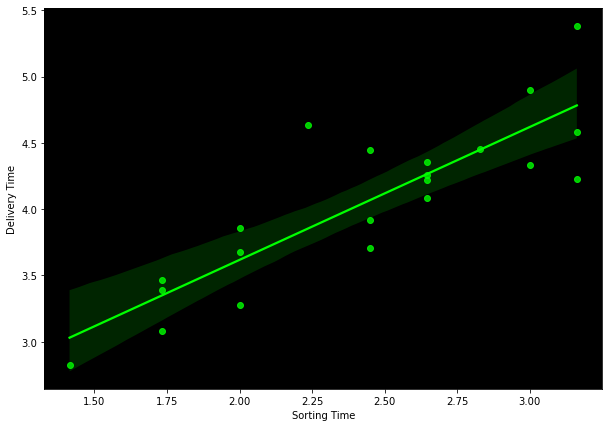

In [154]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_sqrt , y_sqrt , data=df ,color = "lime" );
plt.show()

##  8.inverse model

In [142]:
x_inv=1/x

In [143]:
model8 = smf.ols("y~x_inv",data=df).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     34.27
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.23e-05
Time:                        22:57:36   Log-Likelihood:                -52.571
No. Observations:                  21   AIC:                             109.1
Df Residuals:                      19   BIC:                             111.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5196      1.484     16.518      0.000      21.413      27.626
x_inv        -38.9338      6.651     -5.854      0.000     -52.854     -25.014
==============================================================================
Omnibus:                        7.255   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.797
Skew:                           1.050   Prob(JB):                       0.0909
Kurtosis:                       4.037   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


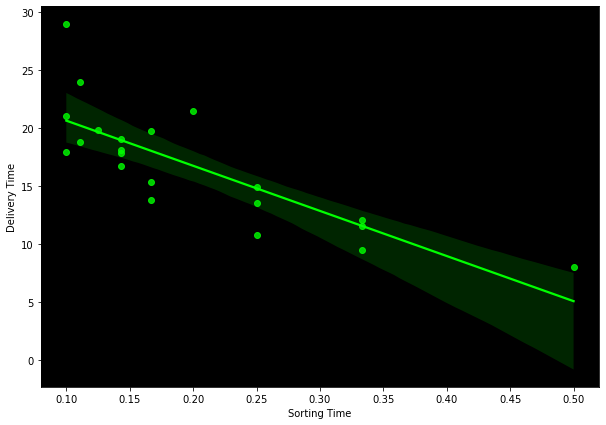

In [155]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_inv , y , data=df ,color = "lime" );
plt.show()

## 9. S-curve model

In [144]:
x_inv=1/x
y_log=np.log(y)

In [196]:
model9 = smf.ols("y_log~x_inv",data=df).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     61.53
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.24e-07
Time:                        00:31:37   Log-Likelihood:                 9.9235
No. Observations:                  21   AIC:                            -15.85
Df Residuals:                      19   BIC:                            -13.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3029      0.076     43.630      0.000       3.144       3.461
x_inv         -2.6605      0.339     -7.844      0.000      -3.370      -1.951
==============================================================================
Omnibus:                        0.870   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.532
Skew:                           0.380   Prob(JB):                        0.767
Kurtosis:                       2.825   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


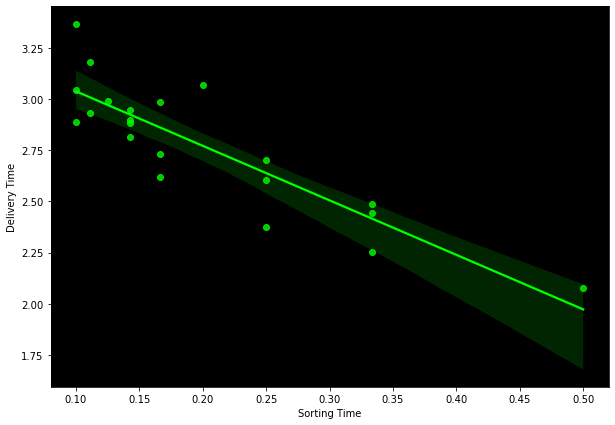

In [156]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_inv , y_log , data=df ,color = "lime" );
plt.show()

In [201]:
#t and p-value
print(model4.tvalues, '\n', model4.pvalues)

Intercept    13.085552
x_log         8.024484
dtype: float64 
 Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64


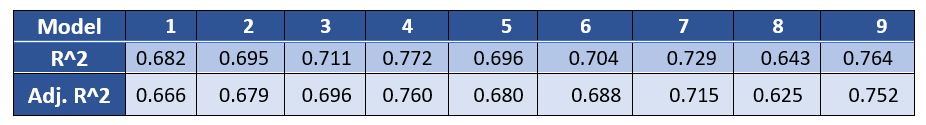

> **We will use Model 4 of Log-Log transformation because of high R-square and Adjusted R-square value**


*   Here p-value is less than 0.05 at 5% level of significance so we may reject the null hypothesis and may conclude that model is significant.

-----

*   Here p-value is less than 0.05 at 5% level of significance so we may reject the null hypothesis and may conclude that regression coefficient are significant.

In [160]:
#Coefficients
model9.params

Intercept    3.302922
x_inv       -2.660538
dtype: float64

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


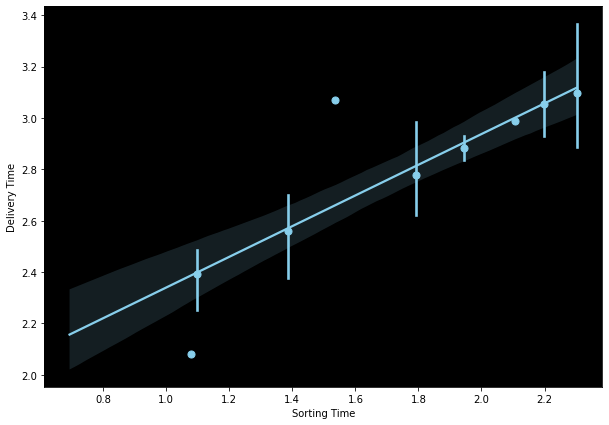

In [171]:
#residual plots:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_log , y_log, x_bins=20, data=df , color = "skyblue")
plt.show()

In [194]:
model9.rsquared

0.7640533808614293

In [195]:
x_nor = np.exp(x_log)
y_nor = np.exp(y_log)

In [200]:
x_nor ,  y_nor

(0     10.0
 1      4.0
 2      6.0
 3      9.0
 4     10.0
 5      6.0
 6      7.0
 7      3.0
 8     10.0
 9      9.0
 10     8.0
 11     4.0
 12     7.0
 13     3.0
 14     3.0
 15     4.0
 16     6.0
 17     7.0
 18     2.0
 19     7.0
 20     5.0
 Name: Sorting Time, dtype: float64,
 0     21.00
 1     13.50
 2     19.75
 3     24.00
 4     29.00
 5     15.35
 6     19.00
 7      9.50
 8     17.90
 9     18.75
 10    19.83
 11    10.75
 12    16.68
 13    11.50
 14    12.03
 15    14.88
 16    13.75
 17    18.11
 18     8.00
 19    17.83
 20    21.50
 Name: Delivery Time, dtype: float64)

In [164]:
(model4.rsquared,model4.rsquared_adj)

(0.7640533808614293, 0.7516351377488729)

> here, the model explains 75% of the variation in dependent variable.

<bold>
<div align="center" style="color:white;
           background-color:#800000;
           font-size:50px;
           font-family:Verdana;
           letter-spacing:1px"> 
    <p style="padding: 10px;color:white;">
     </p>
    
   <center>
       ⪻   Thank You   ⪼   
    </center>  
       </div>
</bold>